# Periodic table with attenuation coefficients
(c) Anders Kaestner, 2024
License: CC BY-NC-ND 4.0
    
Cite with: https://doi.org/

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_excel('Attenuation_coefficients_chemical_elements.xlsx',sheet_name='data')

In [4]:
df

,Name,At. #,Symbol,BP (K),MP (K),Density,Density 2,Density 3,at. wt.,covalent radius,...,Coh b,Inc b,Coh xs,Inc xs,Scatt xs,Abs xs,Total xs (JEF14),Ratio abs/scatt,X-ray 150kV,N/X
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hydrogen,1,H,20.280,13.81,0.0899,0.070,0.070800,1.00797,0.32,...,-3.739,0.00,1.7568,80.2600,82.02,0.33260,30.620000,0.004055,0.180520,19.296932
2,helium,2,He,4.216,0.95,0.1785,0.169,0.124901,4.00260,0.93,...,3.260,0.00,1.3400,0.0000,1.34,0.00747,0.854300,0.005575,0.016065,1.576205
3,lithium,3,Li,1615.000,453.70,0.5300,0.530,0.534000,6.94100,1.23,...,-1.900,0.00,0.4540,0.9200,1.37,70.50000,71.673275,51.459854,0.062579,53.209462
4,beryllium,4,Be,3243.000,1560.00,1.8500,1.850,1.850000,9.01218,0.90,...,7.790,0.12,7.6300,0.0018,7.63,0.00760,6.345000,0.000996,0.221890,4.255119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,hahnium,105,Ha,0.000,0.00,0.0000,0.000,0.000000,262.00000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,seaborgium,106,Sg,0.000,0.00,0.0000,0.000,0.000000,263.00000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,hassium,107,Hs,0.000,0.00,0.0000,0.000,0.000000,262.00000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,bohrium,108,Bh,0.000,0.00,0.0000,0.000,0.000000,265.00000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def plot_element(df,element,ax,modality='n',vmin=0,vmax=5,scale=1,fontsize=9,margin=0.05) :
    ax.set_xlim([0,df['Group'].max()+1])
    ax.set_ylim([0,df['Period'].max()+1])
    ax.invert_yaxis()
    erow = df[df['Symbol']==element]
    group  = erow['Group'].values[0]
    period = erow['Period'].values[0]
    
    if modality == 'n' :
        value = erow['Attenuation coef [1/cm] (Sears)'].values[0]
    else: 
        value = erow['X-ray 150kV'].values[0]
    
#     print(value,group,period)
    if np.isnan(value) :
        value = 0
    graylevel = 1 - (min(max(value, vmin), vmax) - vmin) / (vmax - vmin)
    textcolor = [1, 1, 1] if graylevel < 0.5 else [0, 0, 0]
    valstr = f"{value:.2f}" if value != 0 else '-'
    ax.add_patch(plt.Rectangle(((group+margin)*scale, (period+margin)*scale), 1-2*margin, 1-2*margin, 
                               facecolor = np.array([1, 1, 1]) * graylevel,edgecolor='cornflowerblue')
                                )
    ax.text((group+0.5)*scale, (period+0.5)*scale, f"{element}\n{valstr}", 
            ha='center', fontsize=fontsize, color=textcolor,
         horizontalalignment='center',  # or 'ha' for short
         verticalalignment='center')
    
def render_periodic_table(fontsize=13,modality='n',vmin=0,vmax=5,margin=0.05) : 
    fig,ax = plt.subplots(1,figsize=[df['Group'].max()+1,df['Period'].max()+1])
    ax.axis('off')

    for idx in range(1,109):
        plot_element(df,df['Symbol'][idx],ax,fontsize=fontsize,modality=modality,vmin=vmin,vmax=vmax,margin=margin)

    for i in range(1,19) :
        posx=(i+0.5);
        posy=0.5;
        ax.text(posx+0.02, posy+0.05, f"{i}",
            horizontalalignment='center',
            fontsize=fontsize+1, color=[0.5, 0.5, 0.5])


    for i in range(1,8) :
        posx=(0.5);
        posy=(i+0.5);
        ax.text(posx+0.02, posy+0.05, f"{i}",
                horizontalalignment='center',
                fontsize=fontsize+1, color=[0.5, 0.5, 0.5])

    ax.text(0.5,9.5,'Lanthanides',fontsize=fontsize+1)
    ax.text(0.5,10.5,'Actinides',fontsize=fontsize+1);
    

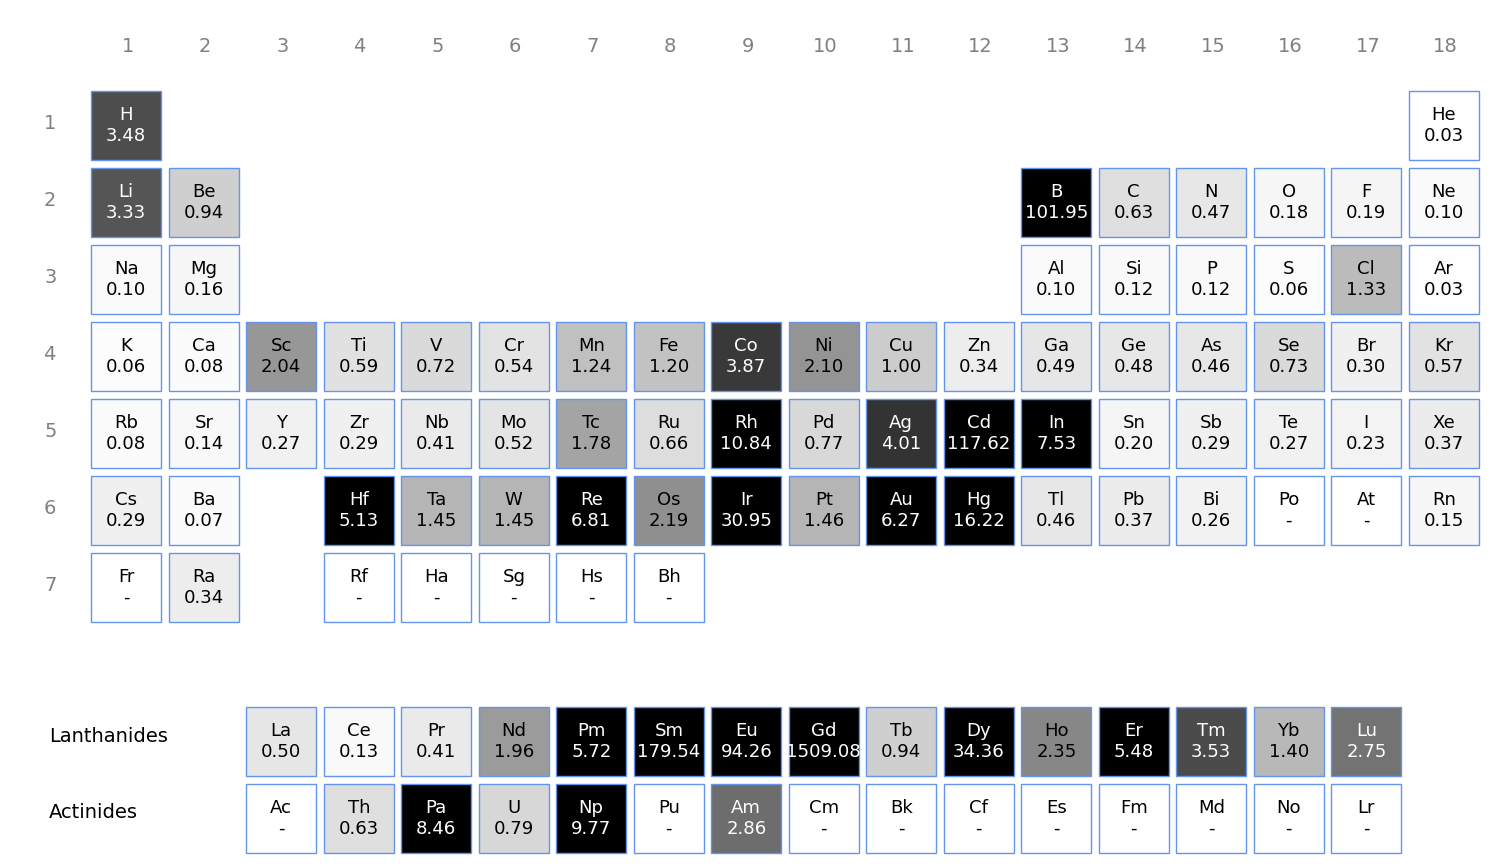

In [9]:
render_periodic_table(modality='n')
plt.savefig('../diagrams/Periodic_NeutronAttenuations.pdf')
plt.savefig('../diagrams/Periodic_NeutronAttenuations.svg')
plt.savefig('../diagrams/Periodic_NeutronAttenuations.png',dpi=300)

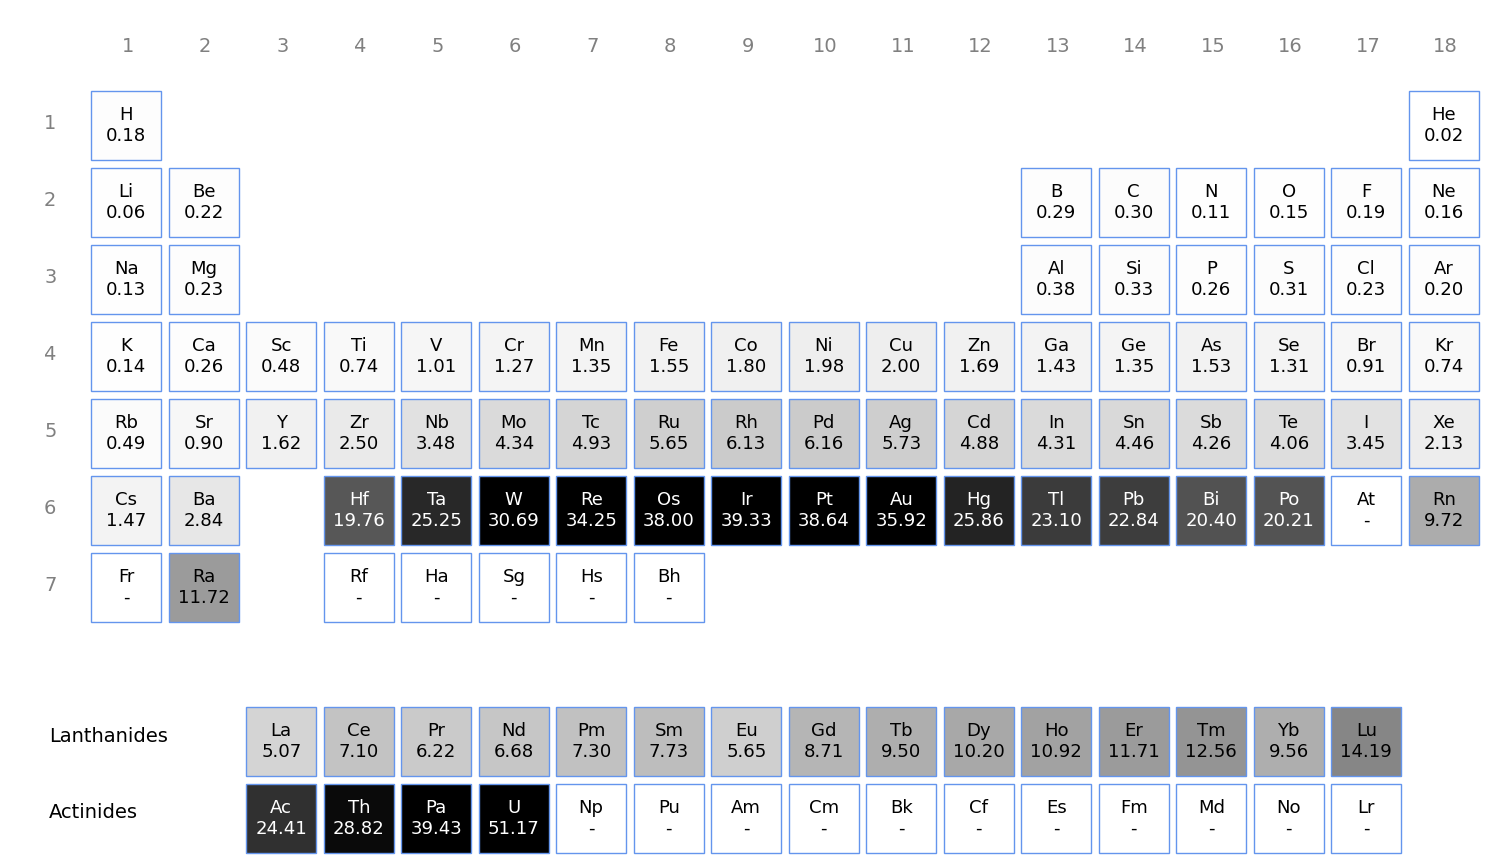

In [10]:
render_periodic_table(modality='x',vmin=0,vmax=30)
plt.savefig('../diagrams/Periodic_XrayAttenuations.pdf')
plt.savefig('../diagrams/Periodic_XrayAttenuations.svg')
plt.savefig('../diagrams/Periodic_XrayAttenuations.png',dpi=300)